# Problem Statement
### To build a multiple linear regression model for the prediction of demand for shared bikes.
A bike-sharing provider Boom Bikes provides a bike sharing system in which bikes are made available for sharing to individuals on a short-term basis for a price or free. Recently Boom Bikes has suffered considerable dips in their revenues due to ongoing Corona  pandemic situation and finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end. Boom Bikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands.
 
### Business Goal:
- Develop a model to find the demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features, they can  accordingly    manipulate the business strategy to meet the demand levels and meet the customer's expectation.
- The model will be a good way for management to understand the demand dynamics of a new market.

### Steps:
- Data Preparation
- Model Building
- Model Evaluation

### Filtering Out Warnings

In [1]:
# Importing warnings code
import warnings
warnings.filterwarnings('ignore')

### Importing all the required Libraries

In [2]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Machine Learning Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Displaying Maximum Rows and Columns

In [3]:
# Setting the maximum rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

### Loading/Reading Data

In [4]:
# Loading data
bike_sharing = pd.read_csv(r'F:\ML Assignment Bike Sharing\day.csv')

In [5]:
# Checking the shape of the dataframe
bike_sharing.shape 

(730, 16)

In [6]:
# Checking the datatype and null values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the quantitative spread of the dataframe
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



Obervation: 
- The dataframe has 730 rows and 16 columns.
- The datatypes of the dataframe is int64 and float except dteday column which is object type. Also some columns are categorical but their datatype is in int64 and float which needs to be converted into categorical type if needed in future.            

### Data Handling and Cleaning

#### Removing Duplicate Values

In [8]:
# Checking for Duplicate values
bike_sharing.duplicated().sum()

0

#### Checking Null values

In [9]:
# Checking the null values
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Obervation:
    
- There are no duplicates in dataframe.
- There are no null values/missing values in the dataframe

#### Outliers

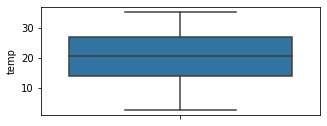

In [10]:
# outliers in 'temp' numerical column variable
plt.figure(figsize = (5, 2))
sns.boxplot(data = bike_sharing, y = 'temp')
plt.show()

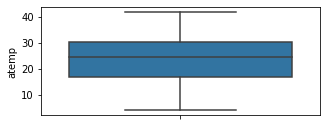

In [11]:
# outliers in 'atemp' column
plt.figure(figsize = (5, 2))
sns.boxplot(data = bike_sharing, y = 'atemp')
plt.show()

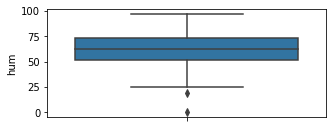

In [12]:
# outliers in 'hum' column
plt.figure(figsize = (5, 2))
sns.boxplot(data = bike_sharing, y = 'hum')
plt.show()

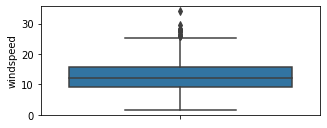

In [13]:
# outliers in 'windspeed' column
plt.figure(figsize = (5, 2))
sns.boxplot(data = bike_sharing, y = 'windspeed')
plt.show()


Observation:
- There are no outliers present in the dataframe.

#### Checking value counts

In [14]:
# Checking Value count of the dataframe
bike_sharing.count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64


Observation:
- There are no missing values in the datframe.

#### Dropping/Removing Reducdant and Unwanted Columns

In [15]:
# Checking the column names
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

From the above column names:
- The 'instant' column contains index value, so we can drop it.
- The 'dteday' column need to be removed as we already have separate columns for 'year' and 'month'.
- We can also drop column 'casual' and 'registered' because both gives the count of the bikes booked. We need only the total count of bikes for which we have 'cnt' column which contains total of both 'casual' and 'registered'.
- 'atemp' column is removed in future analysis after checking correlation between 'temp' and 'atemp'.

#### Dropping unwanted columns

In [16]:
# Dropping the unwanted columns
bike_sharing.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### season, weathersit and weekday are categorical columns, so working on them

In [17]:
# Replacing the numerical value in 'season', 'weathersit', 'weekday' with appropriate datatype
# OR Converting 'season','weathersit', 'weekday' into Categorical type 
bike_sharing['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace = True)
bike_sharing['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)
bike_sharing['weathersit'].replace({1: 'Clear_Few clouds', 2: 'Mist cloudy', 3: 'Light_Snow_Rain', 4: 'Heavy-Rain_Fog'}, inplace = True)
bike_sharing['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}, inplace = True)
bike_sharing.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear_Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_Few clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear_Few clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist cloudy,8.057402,10.44195,49.8696,11.304642,1510


In [18]:
# Total Counts of season category
bike_sharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [19]:
# Total counts of weathersit category 
bike_sharing.weathersit.value_counts()

Clear_Few clouds    463
Mist cloudy         246
Light_Snow_Rain      21
Name: weathersit, dtype: int64

In [20]:
# Total counts of weekday category
bike_sharing.weekday.value_counts()

Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: weekday, dtype: int64

In [21]:
# Total counts of mnth category
bike_sharing.mnth.value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

### Performing EDA

#### Using pairplots for understanding the correlation between the numerical variables

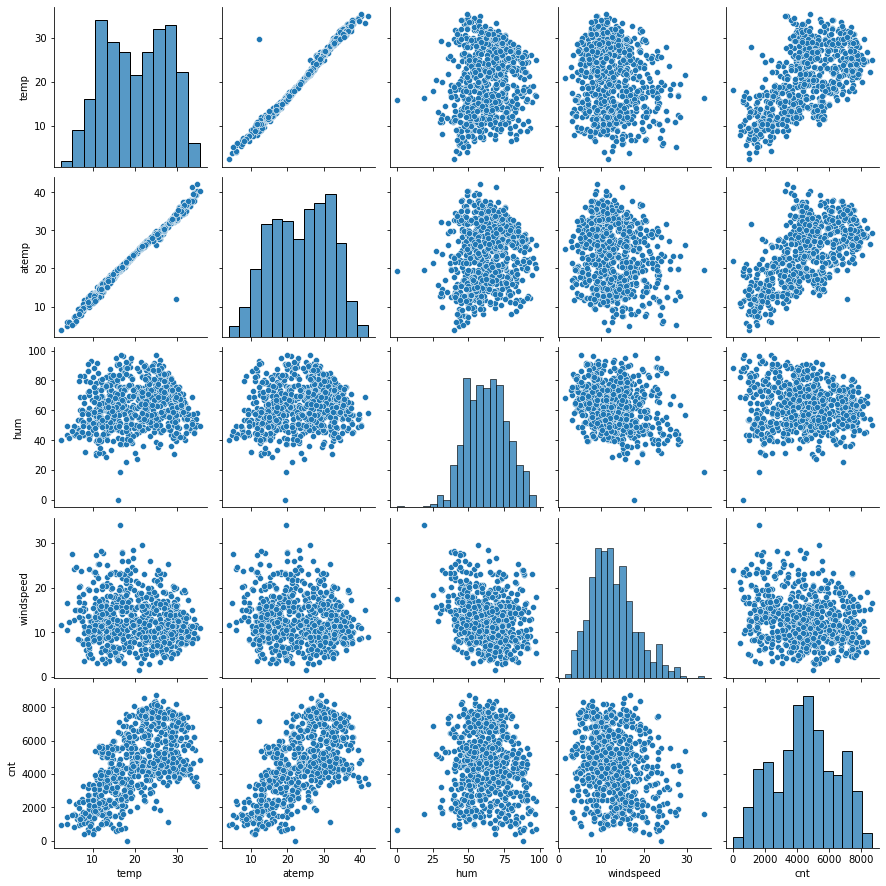

In [22]:
# Pairplot on Numerical Variables
sns.pairplot(bike_sharing, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()


Observation:
- From the above pairplot we can observe that there is a high correlation between 'temp' and 'atemp column variables.

#### Checking the Correlation using heatmap

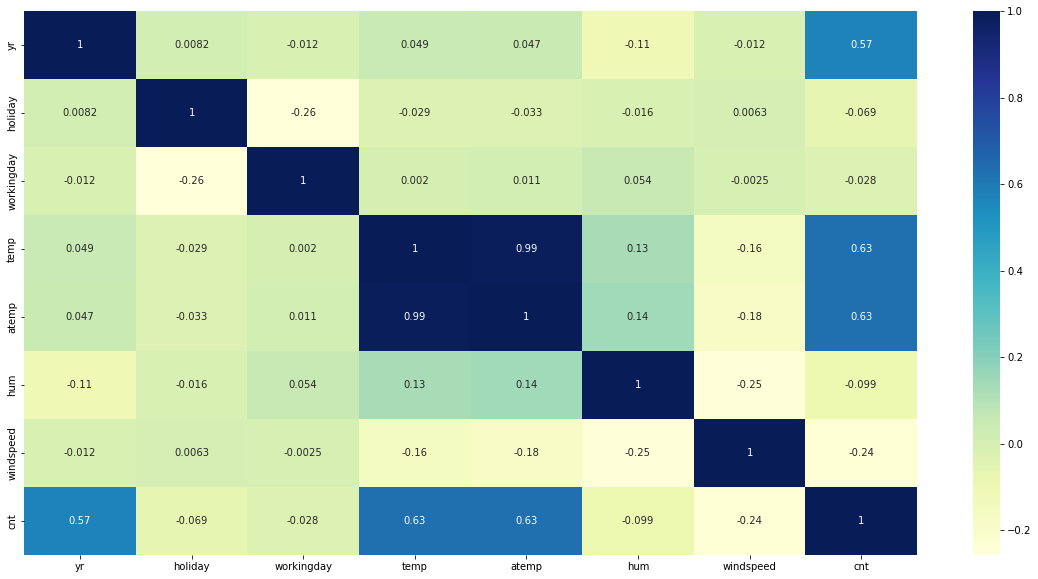

In [23]:
# correlation using heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [24]:
# Checking correlation in the dataframe
bike_sharing.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000



Observation:
- correlation between 'cnt' and 'temp' and between 'cnt' and 'atemp' is 0.63
- There is also very high correlation seen between 'temp' and 'atemp' around 0.99. 
- As 'temp' is Temperature in Celsius whereas 'atemp' is feeling temperature in Celsius we can drop 'atemp' column variable.

#### Dropping 'atemp' column variable

In [25]:
# Dropping 'atemp' column from the dataframe
bike_sharing.drop(['atemp'], axis = 1, inplace = True)
bike_sharing.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_Few clouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear_Few clouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_Few clouds,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear_Few clouds,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist cloudy,8.057402,49.8696,11.304642,1510


#### Visualising Categrical variables Using Boxplot

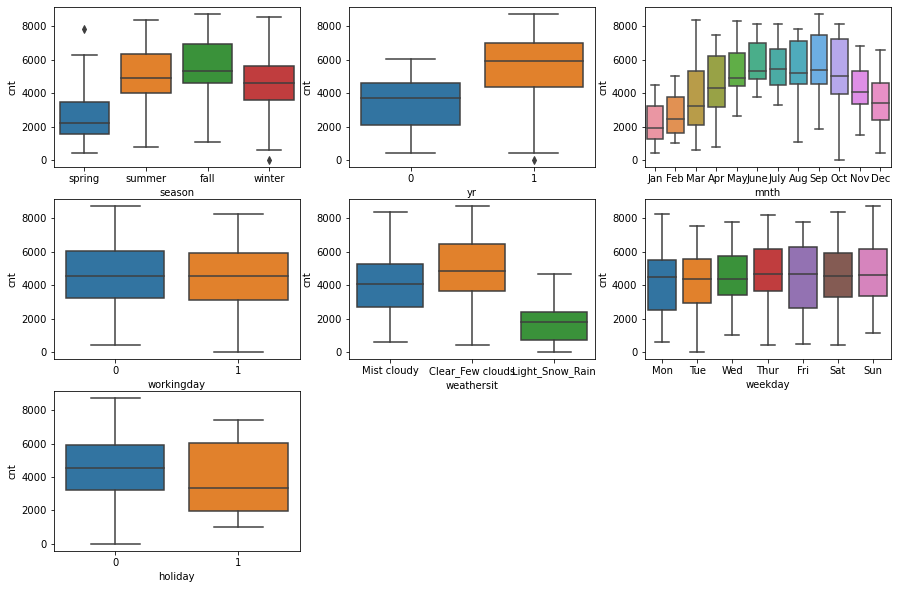

In [26]:
# Using Boxplot to understand categorical variables
plt.figure(figsize = (15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(data = bike_sharing, x = 'season', y = 'cnt')
plt.subplot(3, 3, 2)
sns.boxplot(data = bike_sharing, x = 'yr', y = 'cnt')
plt.subplot(3, 3, 3)
sns.boxplot(data = bike_sharing, x = 'mnth', y = 'cnt')
plt.subplot(3, 3, 4)
sns.boxplot(data = bike_sharing, x = 'workingday', y = 'cnt')
plt.subplot(3, 3, 5)
sns.boxplot(data = bike_sharing, x = 'weathersit', y = 'cnt')
plt.subplot(3, 3, 6)
sns.boxplot(data = bike_sharing, x = 'weekday', y = 'cnt')
plt.subplot(3, 3, 7)
sns.boxplot(data = bike_sharing, x = 'holiday', y = 'cnt')
plt.show()


Observation:
- Season : In season summer(2) and fall(3) the booking of bike was more indicating these seasons are more favorable as the median is crossing 5000 booking.
- yr: In year it is clear that in 2019(1) more booking was observed almost over 6000 bookings.
- mnth: In 5, 6, 7, 8, 9, 10 mnths more booking of bike is happening, the median value is showing nearly 5000 per month booking.
- workingday: more booking is obsereved on working day i.e. the median is over 4000 booking.
- weathersit: weathersit(1) i.e. Clear_Few cloud weather is more preferred for booking bikes than followed by weathersit(2) i.e. Mist cloudy.
- weekday: weekday is showing median between 4000-5000 bookings showing close trend of booking bike.
- holiday: non-holiday is preferred for booking bikes.

### Creating Dummy Variable/Or Encoding

In [27]:
# Checking info again to check datatype
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Creating Dummy Variable

In [28]:
# Dummy Variable creation for the categorical variable/data i.e. 'season'
season_D = pd.get_dummies(bike_sharing.season, drop_first = True)
season_D

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [29]:
# Dummy Variable creation for the categorical variables/data i.e.'mnth'
month_D = pd.get_dummies(bike_sharing.mnth, drop_first = True)
month_D

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [30]:
# Dummy Variable creation for the categorical variable/data i.e. 'weekday'
weekday_D = pd.get_dummies(bike_sharing.weekday, drop_first = True)
weekday_D

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [31]:
# Dummy Variable creation for the categorical variavle/data i.e. 'weathersit'
weathersit_D = pd.get_dummies(bike_sharing.weathersit, drop_first = True)
weathersit_D

,Light_Snow_Rain,Mist cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


#### merging the dummy variable created to the main dataframe

In [32]:
# merging all the dummy variable created to main dataframe
bike_sharing = pd.concat([bike_sharing, season_D], axis = 1)
bike_sharing = pd.concat([bike_sharing, month_D], axis = 1)
bike_sharing = pd.concat([bike_sharing, weekday_D], axis = 1)
bike_sharing = pd.concat([bike_sharing, weathersit_D], axis = 1)
bike_sharing.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
0,spring,0,Jan,0,Mon,1,Mist cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear_Few clouds,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear_Few clouds,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear_Few clouds,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,spring,0,Jan,0,Sat,0,Clear_Few clouds,8.378268,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,spring,0,Jan,0,Sun,0,Mist cloudy,8.057402,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#### Dropping the older columns i.e. 'season', 'mnth', 'weekday', 'weathersit'

In [33]:
# dropping the columns
bike_sharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
bike_sharing.head(7)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [34]:
# Checking the shape again
bike_sharing.shape

(730, 29)

### Test- Train Splitting/Splitting the data into Train - Test

In [35]:
# Splitting into train-test
np.random.seed(0) 
# random_state is used so that the train and test dataset will have same number of rows
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)
print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (510, 29)
Test dataset: (219, 29)


In [36]:
# Checking Train dataset
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
# Quantitative spread of Train dataset
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# Checking Test dataset
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
# Quantitative spread of Test dataset
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,7.689600,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Scaling
- Scaling doesn't affect the model.
- It is important to scale the variables so they have a comparable scale.
- If scaling not done then might be the coefficients obtained by fitting the regression model may be very large or very small compared to other coefficients.
- Standardization or Normalization can be used so the coefficient units obtained have same scale:
        - Min-Max Scaling(Normalization): 0 and 1
        - Standardization: mean(0) and standard deviation(1)

#### MinMaxScaler

In [40]:
# Object instantiate
scaler = MinMaxScaler()

# Creating a list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit on the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Train dataset correlation
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Snow_Rain,Mist cloudy
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-0.011794,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,0.037412,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038279
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,-0.012875,-0.025020,-3.470925e-03,-0.015711,-0.012361,0.032195,-0.008563,0.021720,0.025939,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.068924
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-0.446724,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-3.609266e-02,-0.090161
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-0.071652,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,0.006793,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,-0.008723,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-0.378173,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-2.265984e-01,-0.175530
spring,-0.036320,0.053339,-0.032886,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,0.548861,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,-4.455809e-02,0.013970
summer,0.013856,-0.063232,0.030488,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-0.177257,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,-4.523062e-02,0.039442
winter,-0.022638,0.050712,0.036097,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,-0.187737,0.314816,-1.538999e-01,-0.179136,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608,1.144484e-01,0.023127


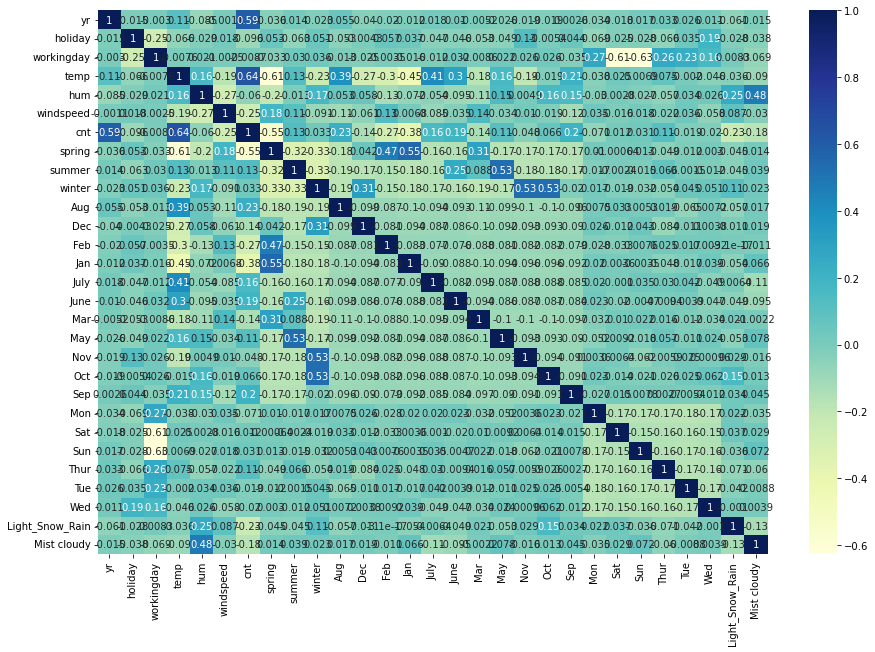

In [43]:
# Train dataset correlation using heatmap
plt.figure(figsize =(15, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Observation:
- 'cnt' and 'temp' have high correlation of 0.64

### Model Building
(Mixed Approach)

#### Dividing dataset into X_train and Y_train for model building

In [44]:
# Creating x_train and y_train
X_train = df_train
Y_train = df_train.pop('cnt')

#### RFE
- LinearRegression function from SciKit Learn is used.

In [45]:
# Using RFE with variable number 15
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm, 15) # Running RFE
rfe = rfe.fit(X_train, Y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light_Snow_Rain', True, 1),
 ('Mist cloudy', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_Snow_Rain',
       'Mist cloudy'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Using statsmodel building model 

##### Model 1

In [49]:
# Using RFE selected variables X-test dataframe creation
X_train_rfe = X_train[col]

In [50]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
lm = sm.OLS(Y_train, X_train_rfe).fit() # Running Linear Model

In [52]:
# Summary of Linear Model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.34e-189
Time:                        16:03:52   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     


Observation:
- We got the values for R-Square: 0.845 and Adjusted R-Square: 0.841. This values are good.
- We need to drop some columns as they are insignificant in presence of other variables like 'hum, 'windspeed', 'Dec', 'Jan', 'July', 'Nov'to make the model more perfect.

In [53]:
# Calculating VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,Nov,1.76
10,Jan,1.68
15,Mist cloudy,1.57
9,Dec,1.49


##### Model 2

##### Manual elimination

Dropping 'hum' variable

In [54]:
# Dropping the 'hum' variable
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

Rebuilding Model

In [55]:
# Rebuilding Model
X_train_lm = sm.add_constant(X_train_new)

In [56]:
lm = sm.OLS(Y_train, X_train_lm).fit() # Running linear model

In [57]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.57e-186
Time:                        16:03:52   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2466      0.032     

In [58]:
# checking Columns
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light_Snow_Rain',
       'Mist cloudy'],
      dtype='object')

##### Model 3

Dropping 'Dec' column

In [59]:
# Dropping 'Dec' column
X_train_new = X_train_new.drop(['Dec'], axis = 1)

Rebuilding Model

In [60]:
# model rebuilding
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_lm).fit() # Running linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.54e-186
Time:                        16:03:52   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2214      0.031     

##### Model 4

Dropping 'Nov' Column

In [61]:
# Dropping 'Nov' columns
X_train_new = X_train_new.drop(['Nov'], axis = 1)

Rebuilding model

In [62]:
# Model rebuilding
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_lm).fit() # running model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.97e-187
Time:                        16:03:52   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2155      0.030     

##### Model 5

Dropping 'Jan' column

In [63]:
# Dropping 'Jan' column
X_train_new = X_train_new.drop(['Jan'], axis = 1)

Rebuilding Model

In [64]:
# model rebuilding
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_lm).fit() # Running linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.40e-187
Time:                        16:03:52   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

##### Model 6

Dropping 'July' column

In [65]:
# Dropping 'July' column
X_train_new = X_train_new.drop(['July'], axis = 1)

Rebuilding Model

In [66]:
# mdel rebuilding
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_lm).fit() # Running linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          7.36e-187
Time:                        16:03:52   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1910      0.030     

##### Model 7

Dropping 'Windspeed' column

In [67]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

Rebuilding Model

In [68]:
# model rebuilding
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_lm).fit() # running linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.89e-181
Time:                        16:03:52   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1415      0.029     

In [69]:
# CHecking VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,47.76
4,spring,4.73
3,temp,3.30
6,winter,3.11
5,summer,2.21
7,Sep,1.17
8,Light_Snow_Rain,1.04
9,Mist cloudy,1.04
1,yr,1.02
2,holiday,1.02


Dropping 'const' as it's VIF value is high

In [70]:
# Dropping 'const'
X_train_new = X_train_new.drop(['const'], axis = 1)

In [71]:
# VIF calculation
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.89
0,yr,2.06
4,summer,1.62
8,Mist cloudy,1.54
5,winter,1.44
3,spring,1.33
6,Sep,1.23
7,Light_Snow_Rain,1.07
1,holiday,1.04


### Residual Analysis of Train Data

Checking error terms if they are normally distributed, so by plotting histogram of error terms we can understand.

In [72]:
Y_train_pred = lm.predict(X_train_lm)

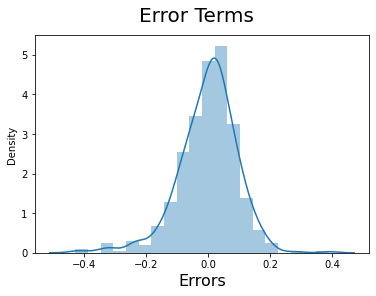

In [73]:
# Plotting the Histogram for the error terms
fig = plt.figure()
sns.distplot((Y_train-Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading
plt.xlabel('Errors', fontsize = 16) # X-label
plt.show()

Observation:
- From above plot of Errors Terms we can say that the residuals are normally distributed.

### Using Final Model to Make Predictions 

#### Scaling on test sets

In [74]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing test sets into X-test and Y_test

In [75]:
X_test = df_test
Y_test = df_test.pop('cnt')

In [76]:
# Now using mdel to make predictions

# X-test_new dataframe is created  by dropping variables from X-test set
X_test_new = X_test[X_train_new.columns]

# Adding constant
X_test_new = sm .add_constant(X_test_new)

In [77]:
# Predictions
Y_pred = lm.predict(X_test_new)

### Evaluating Model

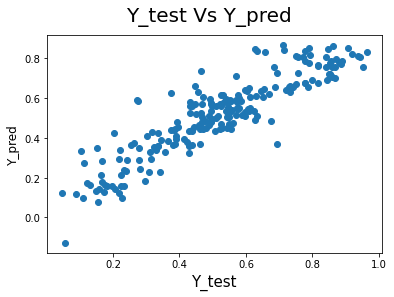

In [78]:
# To understand the spread plot Y_test and Y_pred
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test Vs Y_pred', fontsize = 20) # ploting heading
plt.xlabel('Y_test', fontsize = 15) # X-Label
plt.ylabel('Y_pred', fontsize = 12) # Y_Label
plt.show()

### R-Squared Score

#### R-Score value for train data

In [79]:
print('R-Score Value for Train Data: ', r2_score(Y_train,Y_train_pred))
print('R_Score Value for Test Data: ', r2_score(Y_test, Y_pred))

R-Score Value for Train Data:  0.8216889627076686
R_Score Value for Test Data:  0.8088172921479284


Observation:
- For prdicting the demand for Bike Sharing the Significant Variables are:
    - holiday
    - temp
    - yr(2019)
    - weathersit(Light_Snow_Rain and Mist cloudy)
    - season(summer,spring,winter)

Observation:
- Top 3 variables are: 
               - yr(2019)(Positive Correlation)
               - temp(Positive Correlation)
               - weathersit(Negative Correlation)
               
So for more bike sharing booking the above variables are very important.                 